[[132 133 135 ... 132 130 128]
 [134 135 137 ... 134 131 130]
 [134 136 138 ... 133 130 129]
 ...
 [117 118 119 ... 115 113 112]
 [115 116 117 ... 113 112 111]
 [113 114 116 ... 112 111 110]]


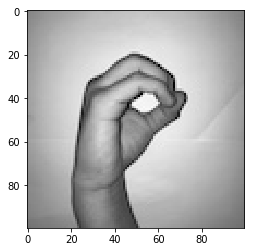

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/home/paa/Dataset"

CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)# convert to array
        print(img_array)
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

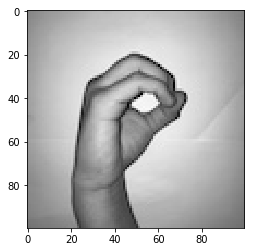

In [4]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()


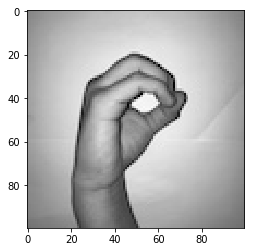

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0-9)

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 204/204 [00:00<00:00, 562.86it/s]

2062


In [7]:
import random

random.shuffle(training_data)

In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[134]
   [135]
   [136]
   ...
   [131]
   [129]
   [129]]

  [[135]
   [136]
   [137]
   ...
   [132]
   [130]
   [130]]

  [[136]
   [137]
   [138]
   ...
   [133]
   [131]
   [131]]

  ...

  [[125]
   [126]
   [127]
   ...
   [117]
   [116]
   [115]]

  [[124]
   [125]
   [126]
   ...
   [115]
   [114]
   [113]]

  [[122]
   [124]
   [125]
   ...
   [114]
   [113]
   [112]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [13]:
print(X[5])
cv2.imshow("img",X[5])
cv2.waitKey(0)
cv2.destroyAllWindows()
print(y[5])

[[[133]
  [135]
  [138]
  ...
  [127]
  [126]
  [125]]

 [[134]
  [137]
  [140]
  ...
  [128]
  [127]
  [125]]

 [[136]
  [138]
  [142]
  ...
  [130]
  [128]
  [126]]

 ...

 [[119]
  [121]
  [123]
  ...
  [119]
  [118]
  [117]]

 [[119]
  [121]
  [123]
  ...
  [118]
  [116]
  [115]]

 [[118]
  [121]
  [122]
  ...
  [117]
  [115]
  [114]]]
6
